# 12.2.1 Principal Component Analysis : PCA

1. 사용하는 이유
- 특성(차원)이 많으면 과대적합이 생길 가능성이 높음
- 특성이 많으면 저장 공간을 많이 차지함
- 머신러닝 모델의 훈련 속도도 느려짐

-> 데이터를 가장 잘 나타내는 (분산을 최대화하는) 새로운 축을 찾는 것
    

2. 단어 정리 

- 차원 축소 : 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습
- 주성분 분석 : 데이터에서 가장 분산이 큰 방향을 찾는다. 
-> 분산(데이터가 퍼진 정도)이 큰 방향 = 첫번째 주성분 // 첫번째 주성분에 수직이고 분산이 가장 큰 다음 방향 = 두번째 주성분
- 설명력 : 주성분이 얼마나 원본 데이터의 분산을 잘 타나내는지 기록한 것 


주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.  
주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다


In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

In [58]:
# https://www.kaggle.com/datasets/uciml/glass
df = pd.read_csv('datasets/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
# 데이터 스케일 정규화 
# 정규화하는 이유는 변수들간의 차이가 큰 경우 분산이 큰 변수가 주성분에 과도하게 영향을 주기 때문이다. 

# 종속변수 삭제 
df1 = df.drop('Type',axis=1)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1) # 주성분을 학습하고 동시에 데이터를 주성분으로 변환

# 컬럼명 결합
df_minmax = pd.DataFrame(data = df_minmax, columns=df1.columns)
df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


함수
n_components 주성분의 개수
explained_variance_ 각 주성분이 설명하는 분산의 양
explained_variance_ratio_ 분산의 비율 저장

In [60]:
# 주성분 생성

# 주성분 최대 수 설정
pca = PCA(n_components=9) #특성이 9개라서

# # 주성분의 개수 말고 원하는 분산의 비율을 입력할 수도 있다. PCA클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다. 
# # 분산의 70%에 달하는 주성분 찾기
# pca = PCA(n_components=0.7)
# pca.fit(df_minmax)
# pca.n_components_ #2 -> 3개의 특성으로 원본 데이터에 있는 분산의 70% 설명 가능

df_pca = pca.fit_transform(df_minmax)

# C1~C9 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca,columns=["C"+str(i) for i in range(1,10)]) 

df_pca

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-0.402106,0.032707,-0.167050,0.192195,-0.042760,-0.013788,-0.052625,-0.025044,0.002736
1,-0.206320,-0.144705,-0.081923,0.020549,-0.035856,-0.044612,-0.002644,-0.038223,-0.001561
2,-0.188617,-0.194854,-0.044696,-0.034466,-0.004489,-0.004353,-0.046631,-0.011359,0.003429
3,-0.237208,-0.097064,-0.086336,0.015069,0.028275,0.019771,0.005081,0.000311,0.014108
4,-0.223972,-0.121779,-0.087395,-0.053228,-0.004463,0.037686,0.019424,-0.025953,0.000431
...,...,...,...,...,...,...,...,...,...
209,0.749082,-0.233155,0.089777,0.117968,0.022261,0.015369,-0.188660,0.029405,-0.004276
210,0.732719,-0.225962,0.023544,0.121874,-0.243783,0.081484,0.038270,0.015808,-0.002184
211,0.739477,-0.141512,-0.001935,0.115061,-0.213393,0.188351,0.023344,-0.121583,0.007158
212,0.723704,-0.228558,0.026492,0.022653,-0.224551,0.161560,0.042011,0.008125,-0.004232


In [61]:
# 주성분 설명력 확인 (주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값)
print(np.round_(pca.explained_variance_ratio_,2)) # 2는 소수점 자릿수
print(np.sum(pca.explained_variance_ratio_))

# 최대 변수의 개수만큼 만들었기 떄문에 합계는 100% 


[0.45 0.18 0.13 0.1  0.07 0.04 0.03 0.   0.  ]
1.0


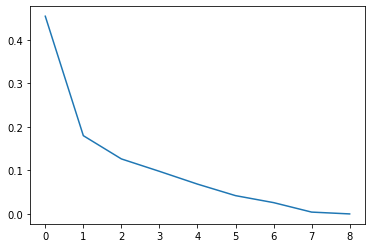

In [62]:
# 분산 그래프로 확인
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 8개의 특성 중에서 뭐... 6개 정도가 대부분의 분산을 표현하고 있다.

In [63]:
# 최대치 -> 2개의 주성분 생성

# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)


# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca,columns=["pca1","pca2"])

df_pca.head()

,pca1,pca2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


In [64]:
# 주성분 테이블에 종속변수 칼럼 결합
df_concat = pd.concat([df_pca,df[['Type']]],axis=1)
df_concat

,pca1,pca2,Type
0,-0.402106,0.032707,1
1,-0.206320,-0.144705,1
2,-0.188617,-0.194854,1
3,-0.237208,-0.097064,1
4,-0.223972,-0.121779,1
...,...,...,...
209,0.749082,-0.233155,7
210,0.732719,-0.225962,7
211,0.739477,-0.141512,7
212,0.723704,-0.228558,7


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

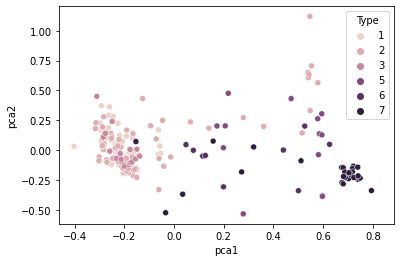

In [67]:
# 주성분에 따른 종속변수(Type) 시각화 / 제 1주성분(x축)과 제 2주성분을(y축)으로 하여 종속변수인 Type이 어떻게 분포하는지

# 산점도 시각화
sns.scatterplot(data=df_concat,x="pca1",y="pca2",hue='Type')
